In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# 1. Install/Import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [4]:
# 2. Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/league_of_legends_data_large.csv')

# 3. Split data into features and target
X = data.drop('win', axis=1)  # Features
y = data['win']               # Target

# 4. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 5. Standardize the features
scaler = StandardScaler()

# Fit the scaler only on training data and transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# 6. Convert to PyTorch tensors
# Features must be FloatTensor, Labels can be FloatTensor for binary classification
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Print shapes to verify
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([800, 8])
y_train_tensor shape: torch.Size([800, 1])
X_test_tensor shape: torch.Size([200, 8])
y_test_tensor shape: torch.Size([200, 1])


In [11]:
import os
print(os.getcwd())

/content


In [12]:
# Define the Logistic Regression Model

import torch
import torch.nn as nn
import torch.optim as optim

# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer (input -> 1 output)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation


In [13]:
# Initialize Model, Loss, and Optimizer

# Get number of input features
input_dim = X_train_tensor.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the Loss function (Binary Cross Entropy Loss)
criterion = nn.BCELoss()

# Define the Optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [14]:
# Model Training + Evaluation

# Set number of epochs
num_epochs = 1000

# Training Loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train_tensor)  # Forward pass (predictions)
    loss = criterion(outputs, y_train_tensor)  # Calculate loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()

with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_preds = (train_outputs >= 0.5).float()

    # Predictions on testing data
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs >= 0.5).float()

    # accuracy
    train_accuracy = (train_preds.eq(y_train_tensor)).sum() / float(y_train_tensor.shape[0])
    test_accuracy = (test_preds.eq(y_test_tensor)).sum() / float(y_test_tensor.shape[0])

print(f'Training Accuracy: {train_accuracy.item()*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy.item()*100:.2f}%')


Epoch [100/1000], Loss: 0.6947
Epoch [200/1000], Loss: 0.6910
Epoch [300/1000], Loss: 0.6887
Epoch [400/1000], Loss: 0.6874
Epoch [500/1000], Loss: 0.6865
Epoch [600/1000], Loss: 0.6860
Epoch [700/1000], Loss: 0.6857
Epoch [800/1000], Loss: 0.6855
Epoch [900/1000], Loss: 0.6854
Epoch [1000/1000], Loss: 0.6854
Training Accuracy: 54.37%
Testing Accuracy: 49.50%


In [15]:
# Model Optimization and Evaluation
import torch.optim as optim

# Set up the optimizer with L2 regularization (weight_decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

num_epoch = 1000

# Training Loop with L2 Regularization
for epoch in range(num_epoch):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1} / {num_epoch}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_pred = (train_outputs >= 0.5).float()

    test_outputs = model(X_test_tensor)
    test_pred = (test_outputs >= 0.5).float()

    train_accuracy = (train_pred.eq(y_train_tensor)).sum() / float(y_train_tensor.shape[0])
    test_accuracy = (test_pred.eq(y_test_tensor)).sum() / float(y_test_tensor.shape[0])

print(f'Training Accuracy: {train_accuracy.item() * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy.item() * 100:.2f}%')


Epoch [100 / 1000], Loss: 0.6853
Epoch [200 / 1000], Loss: 0.6853
Epoch [300 / 1000], Loss: 0.6853
Epoch [400 / 1000], Loss: 0.6853
Epoch [500 / 1000], Loss: 0.6853
Epoch [600 / 1000], Loss: 0.6853
Epoch [700 / 1000], Loss: 0.6853
Epoch [800 / 1000], Loss: 0.6853
Epoch [900 / 1000], Loss: 0.6853
Epoch [1000 / 1000], Loss: 0.6853
Training Accuracy: 54.50%
Testing Accuracy: 50.50%


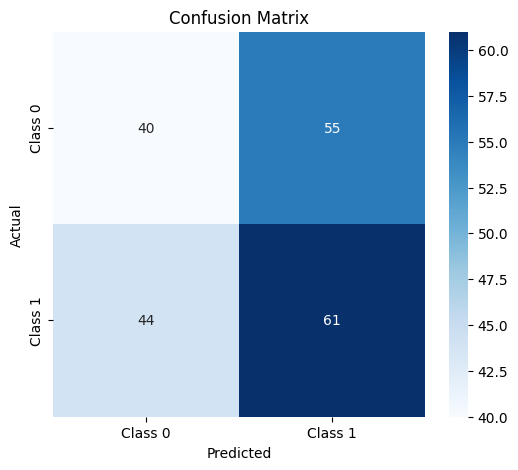

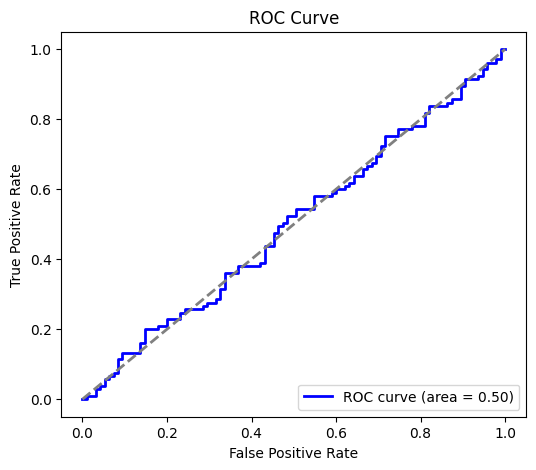

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



In [17]:
#  Visualization and Interpretation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Model evaluation with confusion matrix and ROC curve
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_pred = (test_outputs >= 0.5).float()

# Confusion Matrix
cm = confusion_matrix(y_test_tensor.numpy(), test_pred.numpy())

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), test_outputs.numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Classification Report
class_report = classification_report(y_test_tensor.numpy(), test_pred.numpy())
print("Classification Report:")
print(class_report)


In [24]:
# Model Saving and Loading
import torch

# Step 1: Save the model's state_dict (weights and biases)
torch.save(model.state_dict(), '/content/drive/MyDrive/league_of_legends_model.pth')

# Step 2: Load the model
# Create a new instance of the model
loaded_model = LogisticRegressionModel(input_dim)  # Same architecture as the original model

# Load the state_dict (model weights) into the new model instance
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/league_of_legends_model.pth'))

# Step 3: Evaluate the loaded model
# Set the model to evaluation mode (important for inference)
loaded_model.eval()

# Make predictions and evaluate on the test dataset
with torch.no_grad():
    test_outputs = loaded_model(X_test_tensor)
    test_pred = (test_outputs >= 0.5).float()

    # Calculate test accuracy
    test_accuracy = (test_pred.eq(y_test_tensor)).sum() / float(y_test_tensor.shape[0])

print(f'Testing Accuracy of Loaded Model: {test_accuracy.item() * 100:.2f}%')


Testing Accuracy of Loaded Model: 50.50%


In [19]:
# Hyperparameter Tuning
# Define different learning rates to test
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100
best_lr = None
best_test_accuracy = 0

# Function to train and evaluate the model for a given learning rate
def train_and_evaluate(lr):
    # Reinitialize the model and optimizer
    model = LogisticRegressionModel(input_dim)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)  # L2 Regularization

    criterion = nn.BCELoss()

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test dataset
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_pred = (test_outputs >= 0.5).float()
        test_accuracy = (test_pred.eq(y_test_tensor)).sum() / float(y_test_tensor.shape[0])

    return test_accuracy.item()

# Loop over different learning rates and track the best one
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    test_accuracy = train_and_evaluate(lr)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")

    # Update the best learning rate based on test accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_lr = lr

print(f"Best Learning Rate: {best_lr} with Test Accuracy: {best_test_accuracy * 100:.2f}%")

Training with learning rate: 0.01
Test Accuracy: 47.00%

Training with learning rate: 0.05
Test Accuracy: 53.50%

Training with learning rate: 0.1
Test Accuracy: 51.50%

Best Learning Rate: 0.05 with Test Accuracy: 53.50%


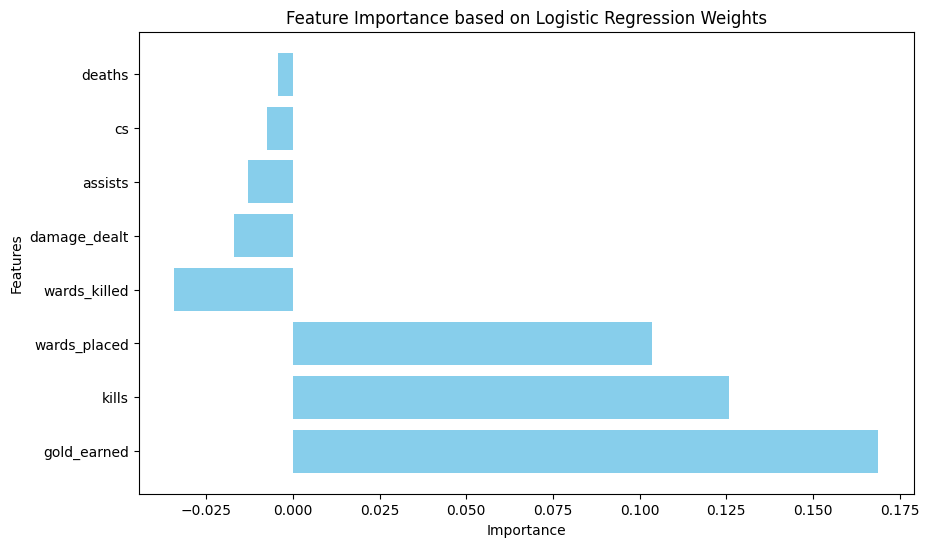

        Feature  Importance
3   gold_earned    0.168844
0         kills    0.125654
5  wards_placed    0.103654
6  wards_killed   -0.034293
7  damage_dealt   -0.016974
2       assists   -0.012828
4            cs   -0.007401
1        deaths   -0.004181


In [21]:
# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer (model.linear.weight)
weights = model.linear.weight.data.numpy().flatten()

# Get the feature names from the dataset (X_train.columns)
feature_names = X.columns

# Create a DataFrame to hold feature names and their corresponding importance values
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': weights
})

# Sort the DataFrame by the absolute value of the importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance based on Logistic Regression Weights')
plt.show()

# Print the sorted feature importance DataFrame
print(feature_importance[['Feature', 'Importance']])
